<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/UMAP_Cliustering_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ckd/data.csv")

In [ ]:
#select columns
select_columns = ['InPatient', 'OutPatient', 'Emergency', 'LabLocation', 'NATNL', 'Sex','Age', 'BMI',  'BSA', 'Diastolic-BP', 'Systolic-BP',
 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
    'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L2-BUN','L3-Creatinine','L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
select_columns = df[select_columns]

##Feature Scaling (Standard Scaler)

In [ ]:
from sklearn.preprocessing import StandardScaler
#data scale
scaler = StandardScaler()
data_scale = scaler.fit_transform(select_columns)
data_scale = pd.DataFrame(data_scale, columns=select_columns.columns)

#add colums 'InPatient', 'OutPatient', 'Emergency', 'NATNL', 'Sex'
additional_columns = df[['InPatient', 'OutPatient', 'Emergency', 'LabLocation', 'NATNL', 'Sex']]
data_scale = pd.concat([data_scale, additional_columns], axis=1)

In [ ]:
data_scale.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,LabLocation,NATNL,Sex
0,0.531249,-1.055973,-1.625472,0.160130,-0.525000,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,...,-0.803614,0.321723,3.686025,-1.158713,0,1,0,1,0,1
1,0.617111,-1.201074,-1.686392,-0.793624,-1.800103,2.991739,1.392719,-0.129510,-0.176477,-0.333859,...,-1.038268,0.983545,1.640595,-1.258996,0,1,0,1,0,1
2,0.702974,-1.077875,-1.686392,0.246834,0.112551,3.360578,1.625099,4.073425,-0.176477,-0.333859,...,-1.065875,0.494372,1.011232,-0.988847,0,1,0,1,0,1
3,0.788837,-1.201074,-1.808232,-0.620214,-0.119286,0.963126,-0.698699,-0.005894,2.205286,-0.333859,...,-0.969252,0.782121,1.876606,-0.884842,0,1,0,1,0,1
4,0.960563,-1.535080,-1.990992,-1.400558,-1.916021,3.360578,-0.698699,1.724726,-0.176477,-0.333859,...,-0.900236,0.494372,0.617880,-1.026662,0,1,0,1,0,1


In [ ]:
data_scale.shape

(52620, 72)

In [ ]:
#data_scale.to_csv('data_scale.csv')

##UMAP

- min_dist : ควบคุมความแน่นหนาของ UMAP มีช่วงของค่าตั้งแต่ 0.0 ถึง 0.99

In [ ]:
pip install umap-learn

In [ ]:
from umap import UMAP

X = data_scale.copy()
# compute 2D embedding of raw variable values
X_2d = UMAP(
  n_components=2, n_neighbors=1000, min_dist=0.99
).fit_transform(X)

<ipython-input-7-dd32ffcb60f2>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_2d[:, 0], X_2d[:, 1], marker='o', s=5, cmap='viridis')


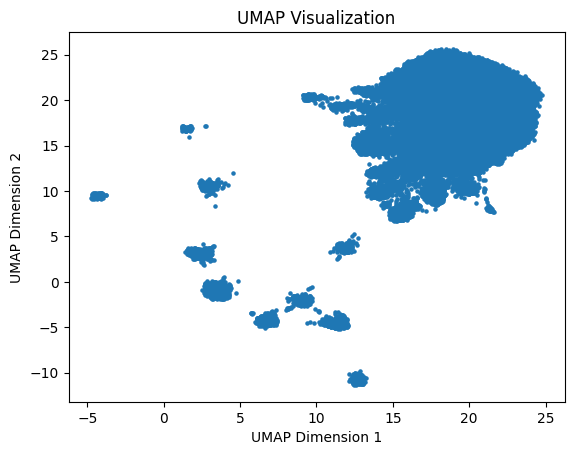

In [ ]:
import matplotlib.pyplot as plt
# Assuming X_2d is your 2D embedding
plt.scatter(X_2d[:, 0], X_2d[:, 1], marker='o', s=5, cmap='viridis')

# Add labels and title if needed
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization')

# Show the plot
plt.show()


# Save the plot as PNG file
#plt.savefig('umap_n1000.png', dpi=300)

## DBSCAN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
data = X_2d.copy()

ใช้ ค่า Silhouette Coefficient  เป็นตัวชี้วัดในการวัดประเมินการจัดกลุ่ม
- ค่า Silhouette Coefficient เป็นตัววัดที่ใช้วัดความคล้ายคลึงภายในกลุ่มและความแตกต่างระหว่างกลุ่ม
- ค่า Silhouette Coefficient มีค่าอยู่ในช่วง [-1, 1] โดยค่าที่ใกล้ 1 จะแสดงถึงการแบ่งกลุ่มที่ดี และค่าที่ใกล้ -1 จะแสดงถึงการแบ่งกลุ่มที่ไม่ดี

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=500).fit(data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels):.2f}")

Estimated number of clusters: 3
Estimated number of noise points: 1529
Silhouette Coefficient: 0.68


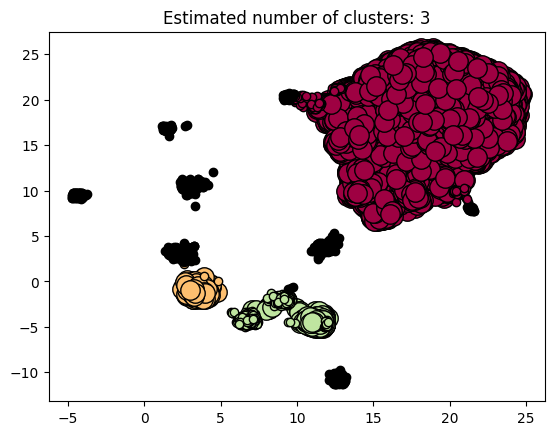

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [ ]:
import numpy as np

# Find unique labels
unique_labels = np.unique(labels)

# Count the number of data points in each cluster
for label in unique_labels:
    if label == -1:
        # Skip noise points
        continue
    # Create a boolean mask for the current cluster
    cluster_mask = (labels == label)
    # Count the number of data points in the cluster
    num_points = np.sum(cluster_mask)
    print(f"Cluster {label}: {num_points} data points")

Cluster 0: 49095 data points
Cluster 1: 641 data points
Cluster 2: 1355 data points


### save ไฟล์

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Assuming you have your data and data_scale ready

# Perform DBSCAN clustering
db = DBSCAN(eps=2, min_samples=500).fit(data)
labels = db.labels_

In [ ]:
#ข้อมูลที่ scale
# Create a DataFrame from the labels obtained from DBSCAN
labels_df = pd.DataFrame(labels, columns=['labels'])

# Add the 'labels' column to the scaled data
data_dbscan_scale = pd.concat([data_scale, labels_df], axis=1)
data_dbscan_scale

In [ ]:
#select columns
columns = ['InPatient', 'OutPatient', 'Emergency', 'LabLocation', 'NATNL', 'Sex','Age', 'BMI',  'BSA', 'Diastolic-BP', 'Systolic-BP',
 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
    'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L2-BUN','L3-Creatinine','L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
columns = df[columns]
columns

In [ ]:
#ข้อมูลที่ไม่ได้ทำการ scale
# Create a DataFrame from the labels obtained from DBSCAN
labels_df = pd.DataFrame(labels, columns=['labels'])

# Add the 'labels' column to the scaled data
data_dbscan = pd.concat([columns, labels_df], axis=1)
data_dbscan

In [ ]:
#save file data
data_dbscan_scale .to_csv('/content/drive/MyDrive/ckd/data_DBSCAN_scale.csv', index=False)
data_dbscan.to_csv('/content/drive/MyDrive/ckd/data_DBSCAN.csv', index=False)

In [ ]:
unique_labels = data_dbscan['labels'].unique()
unique_labels

array([ 0, -1,  1,  2])

In [ ]:
data_with_label_0 = data_dbscan[data_dbscan['labels'] == 0]
data_with_label_0.shape

(49095, 73)

In [ ]:
# ลบข้อมูลที่มี labels เป็น -1
data_cleaned = data_dbscan[data_dbscan['labels'] != -1]

# เปลี่ยนชื่อข้อมูลใน labels โดยที่ 0 จะกลายเป็น 1 และ 1 จะกลายเป็น 2
data_cleaned['labels'] = data_cleaned['labels'].replace({0: 1, 1: 2, 2: 3})
data = data_cleaned.copy()

<ipython-input-68-5bde2341909d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['labels'] = data_cleaned['labels'].replace({0: 1, 1: 2, 2: 3})


In [ ]:
data.shape #  หลังตัด Noise

(51091, 73)

In [ ]:
# ลบข้อมูลที่มี labels เป็น -1
data_cleaned = data_dbscan_scale [data_dbscan_scale ['labels'] != -1]

# เปลี่ยนชื่อข้อมูลใน labels โดยที่ 0 จะกลายเป็น 1 และ 1 จะกลายเป็น 2
data_cleaned['labels'] = data_cleaned['labels'].replace({0: 1, 1: 2, 2: 3})
data = data_cleaned.copy()

<ipython-input-75-46073f96b19e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['labels'] = data_cleaned['labels'].replace({0: 1, 1: 2, 2: 3})


In [ ]:
data.shape#  หลังตัด Noise

(51091, 73)

##Random Forest

In [58]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/ckd/clustering/data_DBSCAN_scale.csv")

In [46]:
data

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,LabLocation,NATNL,Sex,labels
0,0.531249,-1.055973,-1.625472,0.160130,-0.525000,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,...,0.321723,3.686025,-1.158713,0,1,0,1,0,1,0
1,0.617111,-1.201074,-1.686392,-0.793624,-1.800103,2.991739,1.392719,-0.129510,-0.176477,-0.333859,...,0.983545,1.640595,-1.258996,0,1,0,1,0,1,0
2,0.702974,-1.077875,-1.686392,0.246834,0.112551,3.360578,1.625099,4.073425,-0.176477,-0.333859,...,0.494372,1.011232,-0.988847,0,1,0,1,0,1,0
3,0.788837,-1.201074,-1.808232,-0.620214,-0.119286,0.963126,-0.698699,-0.005894,2.205286,-0.333859,...,0.782121,1.876606,-0.884842,0,1,0,1,0,1,0
4,0.960563,-1.535080,-1.990992,-1.400558,-1.916021,3.360578,-0.698699,1.724726,-0.176477,-0.333859,...,0.494372,0.617880,-1.026662,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,-0.327380,1.394314,1.359609,0.420244,-0.119286,3.360578,1.625099,-0.129510,-0.176477,-0.333859,...,-0.800496,-0.719516,0.741185,0,1,0,1,0,0,0
52616,0.359523,0.359444,-0.163391,-1.400558,-0.525000,-0.327810,1.625099,-0.129510,-0.176477,-0.333859,...,-0.829271,-0.798187,4.091990,0,1,0,1,0,1,0
52617,-0.069792,-0.227283,0.262439,1.200588,-0.351123,-0.327810,-0.698699,-0.129510,-0.176477,-0.333859,...,-1.375994,-1.506220,0.277258,0,0,1,1,0,0,0
52618,0.016071,-0.624476,-0.241369,0.853769,0.054591,-0.327810,-0.698699,-0.129510,-0.176477,-0.333859,...,0.713925,1.196108,-1.051435,0,1,0,1,0,0,0


In [59]:
# ลบข้อมูลที่มี labels เป็น -1
data_cleaned = data [data ['labels'] != -1]

# เปลี่ยนชื่อข้อมูลใน labels โดยที่ 0 จะกลายเป็น 1 และ 1 จะกลายเป็น 2
data_cleaned['labels'] = data_cleaned['labels'].replace({0: 1, 1: 2, 2: 3})
data = data_cleaned.copy()

<ipython-input-59-b3ae76b40ec4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['labels'] = data_cleaned['labels'].replace({0: 1, 1: 2, 2: 3})


In [ ]:
unique_labels = data['labels'].unique()
unique_labels

array([1, 2, 3])

In [48]:
data.shape

(51091, 73)

In [63]:
data = data.head(300)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [68]:
#ปรับค่าในคอลัมน์ labels เพื่อให้กลุ่มที่เราสนใจเป็น 1 และกลุ่มอื่นๆเป็น 0:
data['labels'] = data['labels'].apply(lambda x: 1 if x == 1 else 0)

X = data.drop('labels', axis=1)  # ตัวแปรต้น
y = data['labels']  # ตัวแปรตาม (กลุ่ม 1 ,2,3)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# สร้างโมเดล Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.98      0.99        89

    accuracy                           0.98        90
   macro avg       0.67      0.99      0.74        90
weighted avg       0.99      0.98      0.98        90



SHAP

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.2 MB/s eta 0:00:00


In [70]:
import shap
# สร้าง explainer
explainer = shap.TreeExplainer(model )
shap_values = explainer.shap_values(X_test)

#plt.savefig('summary_plot_SHAP.png', dpi=300, bbox_inches='tight')